In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Dataset/flight_delays_train.csv.zip', compression='zip')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [4]:
df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [5]:
df.sample(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
70226,c-1,c-12,c-3,749,UA,BOS,IAD,413,N
90138,c-9,c-28,c-4,1155,OH,BNA,CVG,230,N
7235,c-11,c-1,c-2,1514,DL,ATL,SAT,874,N
48188,c-3,c-1,c-2,1040,WN,PHX,OKC,833,N
31159,c-6,c-29,c-4,1740,US,CLT,IAD,321,N
75244,c-11,c-7,c-2,1525,YV,SBP,PHX,509,N
2360,c-1,c-2,c-1,607,XE,ALB,CLE,424,N
75451,c-11,c-30,c-3,1941,OO,ORD,MLI,139,N
58080,c-8,c-3,c-3,1305,AA,DFW,DCA,1192,N
12263,c-7,c-16,c-6,934,NW,MEM,VPS,369,N


In [6]:
df['dep_delayed_int'] = df['dep_delayed_15min'] == 'Y'

In [7]:
aux = df
aux[['letter', 'Month']] = df['Month'].str.split('-', 1, expand=True)
aux

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,dep_delayed_int,letter
0,8,c-21,c-7,1934,AA,ATL,DFW,732,N,False,c
1,4,c-20,c-3,1548,US,PIT,MCO,834,N,False,c
2,9,c-2,c-5,1422,XE,RDU,CLE,416,N,False,c
3,11,c-25,c-6,1015,OO,DEN,MEM,872,N,False,c
4,10,c-7,c-6,1828,WN,MDW,OMA,423,Y,True,c
...,...,...,...,...,...,...,...,...,...,...,...
99995,5,c-4,c-3,1618,OO,SFO,RDD,199,N,False,c
99996,1,c-18,c-3,804,CO,EWR,DAB,884,N,False,c
99997,1,c-24,c-2,1901,NW,DTW,IAH,1076,N,False,c
99998,4,c-27,c-4,1515,MQ,DFW,GGG,140,N,False,c


In [8]:
aux['Month'] = pd.to_numeric(aux['Month'])

In [9]:
df['Month'] = aux['Month']

In [10]:
aux = df
aux[['letter', 'DayOfWeek']] = df['DayOfWeek'].str.split('-', 1, expand=True)
aux['DayOfWeek'] = pd.to_numeric(aux['DayOfWeek'])
df['DayOfWeek'] = aux['DayOfWeek']

aux = df
aux[['letter', 'DayofMonth']] = df['DayofMonth'].str.split('-', 1, expand=True)
aux['DayofMonth'] = pd.to_numeric(aux['DayofMonth'])
df['DayofMonth'] = aux['DayofMonth']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  int64 
 1   DayofMonth         100000 non-null  int64 
 2   DayOfWeek          100000 non-null  int64 
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
 9   dep_delayed_int    100000 non-null  bool  
 10  letter             100000 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 7.7+ MB


In [11]:
df['Origin'].value_counts()

ATL    5834
ORD    4870
DFW    4270
LAX    3259
IAH    3048
       ... 
VIS       1
WYS       1
ILG       1
VCT       1
ADK       1
Name: Origin, Length: 289, dtype: int64

In [12]:
df['Origin'].value_counts().describe()

count     289.000000
mean      346.020761
std       739.424875
min         1.000000
25%        23.000000
50%        67.000000
75%       272.000000
max      5834.000000
Name: Origin, dtype: float64

In [13]:
df['Dest'].value_counts()

ATL    5795
ORD    4933
DFW    4337
LAX    3205
IAH    3056
       ... 
LWB       1
TEX       1
ACK       1
TTN       1
VCT       1
Name: Dest, Length: 289, dtype: int64

In [14]:
df['Dest'].value_counts().describe()

count     289.000000
mean      346.020761
std       739.527162
min         1.000000
25%        24.000000
50%        65.000000
75%       268.000000
max      5795.000000
Name: Dest, dtype: float64

In [15]:
destination_count = df['Dest'].value_counts().to_frame()
destination_count.reset_index(inplace=True)

In [16]:
destination_count.head()

,index,Dest
0,ATL,5795
1,ORD,4933
2,DFW,4337
3,LAX,3205
4,IAH,3056


Quiero ver si el origen y destino es una variable que afecta al retraso de los vuelos. Asi que voy a eliminar los origenes y destinos poco concurridos para que no metan ruido en mi analisis.

In [17]:
destination_count.loc[destination_count['Dest'] > 24, 'index']

0      ATL
1      ORD
2      DFW
3      LAX
4      IAH
      ... 
211    EKO
212    DBQ
213    LCH
214    TRI
215    SPS
Name: index, Length: 216, dtype: object

In [18]:
# Corto en minimo 24 vuelos porque se que estoy tomando el 75% de los datos con mayor valor segun lo que vi en el describe del value counts
df_destinations_filtered = df[df['Dest'].isin(destination_count.loc[destination_count['Dest'] > 24, 'index'])]

In [19]:
origin_count =df['Origin'].value_counts().to_frame()
origin_count.reset_index(inplace=True)
origin_count.head()

,index,Origin
0,ATL,5834
1,ORD,4870
2,DFW,4270
3,LAX,3259
4,IAH,3048


In [20]:
df_fully_filtered = df_destinations_filtered[df_destinations_filtered['Origin'].isin(origin_count.loc[origin_count['Origin'] > 24, 'index'])]

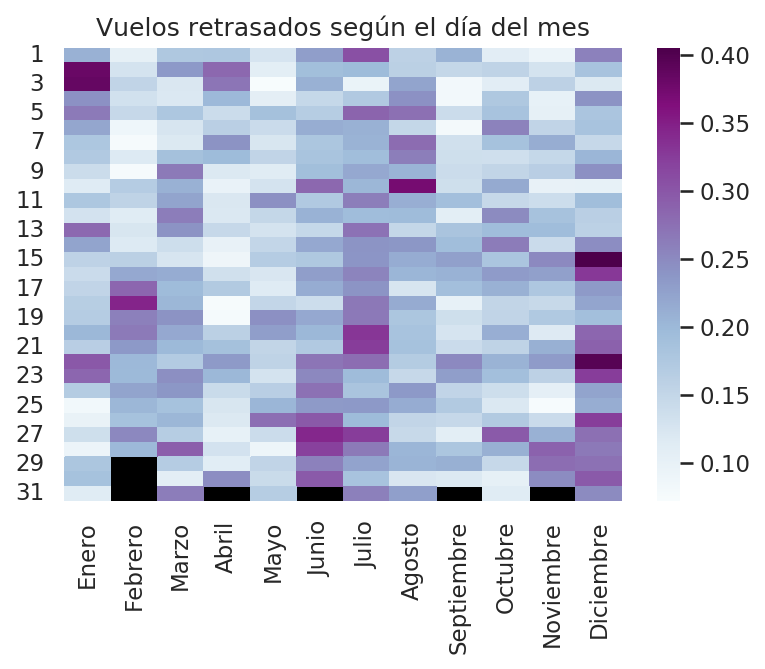

In [21]:
# sns.set(rc={'figure.figsize':(10,10)}, font_scale=1.5)
sns.set(rc={"figure.dpi": 150, 'savefig.dpi': 150})

flights = df.pivot_table(values='dep_delayed_int', index='DayofMonth', columns='Month', aggfunc='mean')

ax = sns.heatmap(flights, cmap="BuPu")
# title
ax.set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
                  rotation=90)

ax.set(title='Vuelos retrasados según el día del mes', xlabel='', ylabel='')
ax.set_facecolor('black')

pip install squarify

In [22]:
delayed_by_destiny = df.groupby('Dest')['dep_delayed_int'].sum().to_frame().reset_index()

In [23]:
delayed_by_destiny[delayed_by_destiny['dep_delayed_int'] > 0]

,Dest,dep_delayed_int
0,ABE,17
1,ABI,8
2,ABQ,110
3,ABY,6
5,ACT,3
...,...,...
284,WRG,4
285,WYS,2
286,XNA,47
287,YAK,1


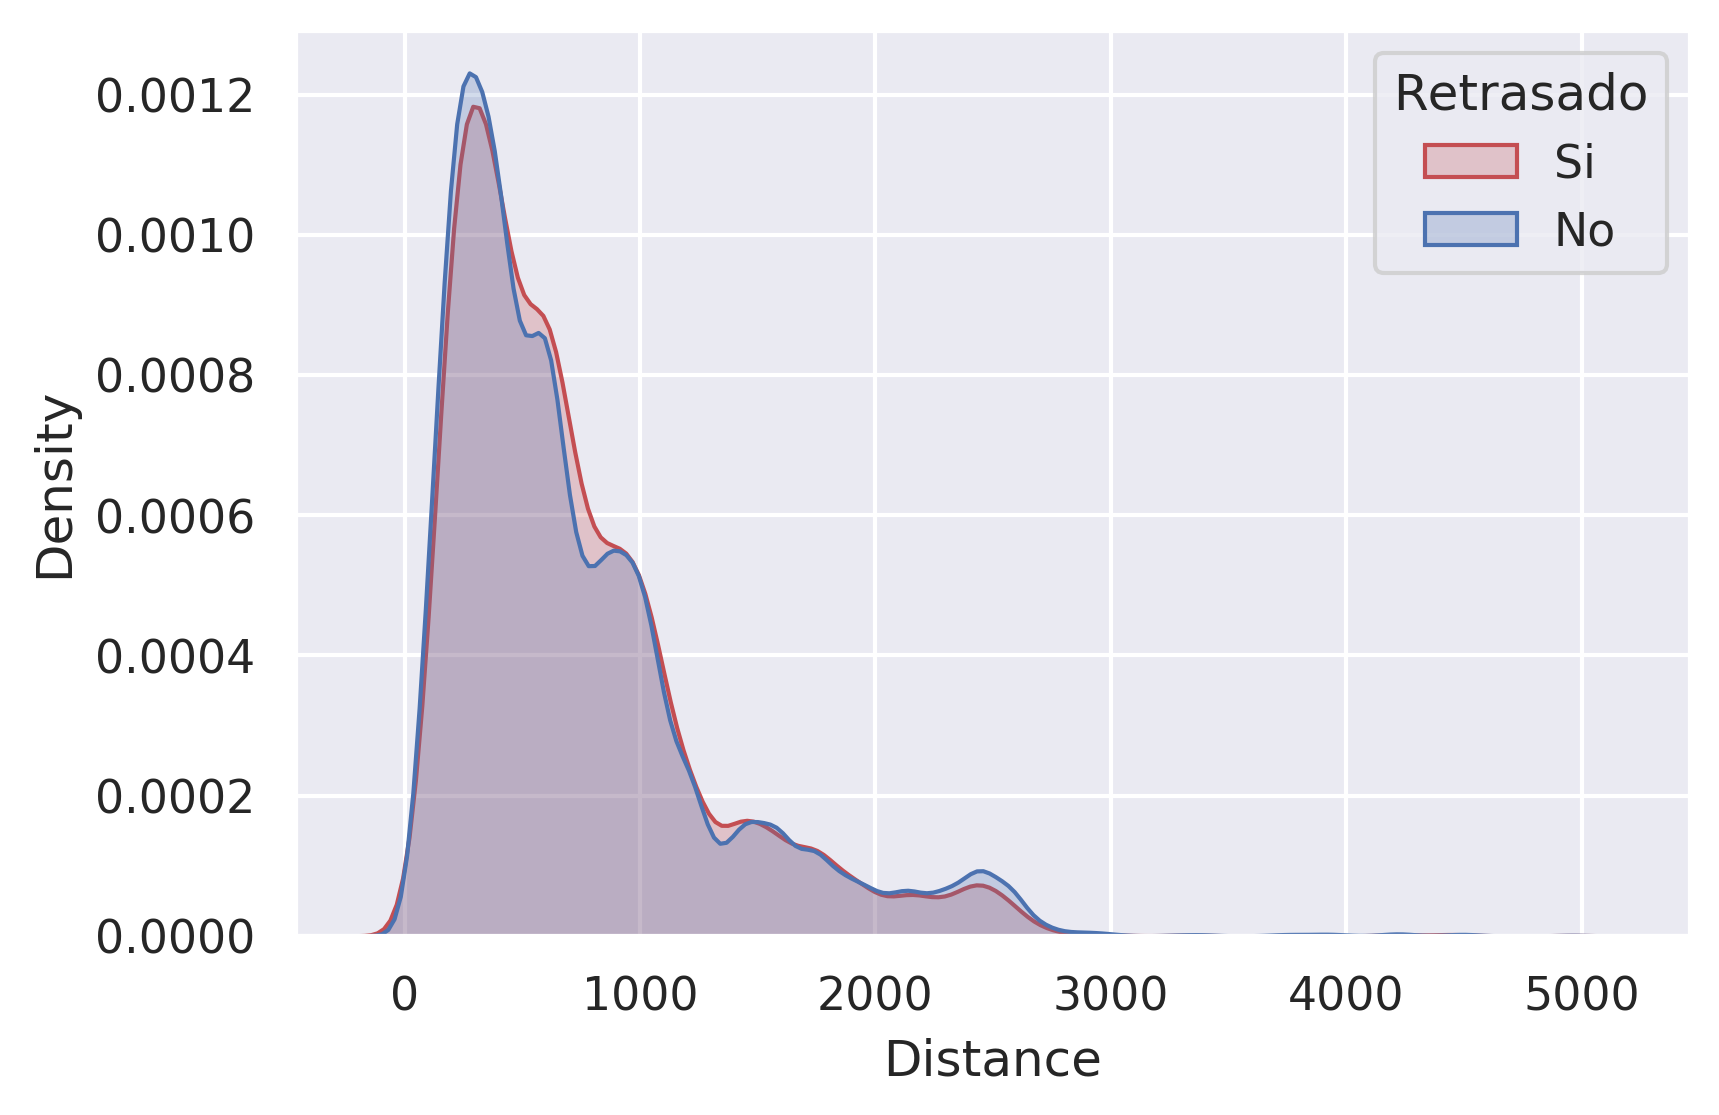

In [31]:
# df4 = delayed_by_distance

# ax = sns.displot(df, x="Distance", 
#             hue="dep_delayed_int", 
#             element="step", legend=False, palette={False: 'green', True: 'red'}, aspect=20/10) # , height=10, aspect=20/10)

delayed = df[df['dep_delayed_int'] == 1]
on_time = df[df['dep_delayed_int'] == 0]
fig = sns.kdeplot(delayed['Distance'], shade=True, color="r")
fig = sns.kdeplot(on_time['Distance'], shade=True, color="b")

sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})

plt.legend(title='Retrasado', labels=['Si', 'No'])
plt.show()


In [33]:
df['route'] = df[["Origin", "Dest"]].apply("-".join, axis=1)

In [35]:
df['route'].value_counts()

SAN-LAX    217
LAS-LAX    186
LGA-ORD    184
LAX-SAN    182
LAX-PHX    181
          ... 
CVG-MDW      1
PDX-ONT      1
GST-JNU      1
VIS-FAT      1
SFO-EGE      1
Name: route, Length: 4429, dtype: int64

In [36]:
df['route'].value_counts().describe()

count    4429.000000
mean       22.578460
std        23.914841
min         1.000000
25%         7.000000
50%        15.000000
75%        30.000000
max       217.000000
Name: route, dtype: float64

In [40]:
df['UniqueCarrier'].value_counts()

WN    15082
AA     9418
DL     8128
MQ     7443
OO     7390
UA     6876
US     6482
NW     6403
XE     5901
OH     4594
CO     4334
EV     3930
FL     3039
AS     2222
YV     2128
B6     1838
HP     1378
F9     1006
DH      966
HA      762
TZ      446
AQ      234
Name: UniqueCarrier, dtype: int64

In [57]:
carriers_ordered = df.groupby('UniqueCarrier').agg({'dep_delayed_int': 'mean'}).reset_index().sort_values(by='dep_delayed_int', ascending=False)['UniqueCarrier']

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Proporcion'),
 Text(0.5, 1.0, 'Retrasos segun carrier')]

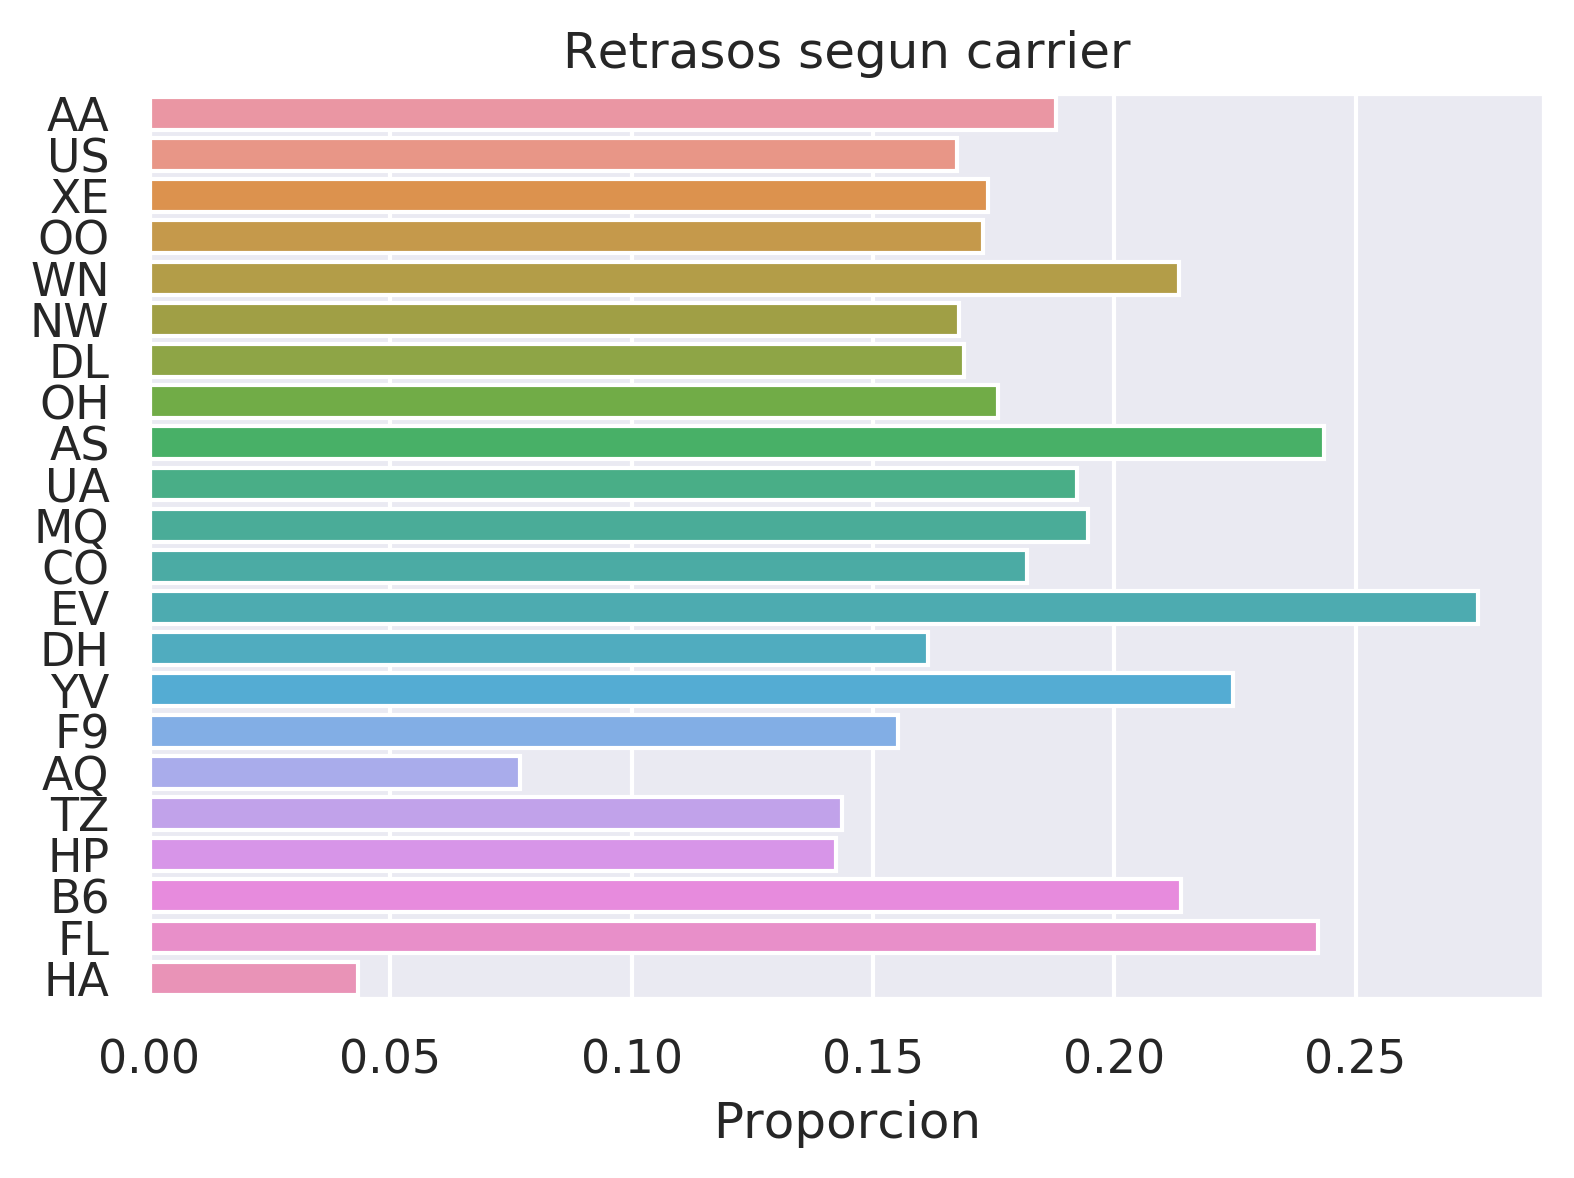

In [59]:
ax = sns.barplot(
    x="dep_delayed_int", 
    y="UniqueCarrier", 
    data=df, 
    estimator=np.mean, 
    ci=None)

ax.set(title='Retrasos segun carrier', xlabel='Proporcion', ylabel='')

[Text(0, 0.5, ''),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Proporción de retrasos segun carrier')]

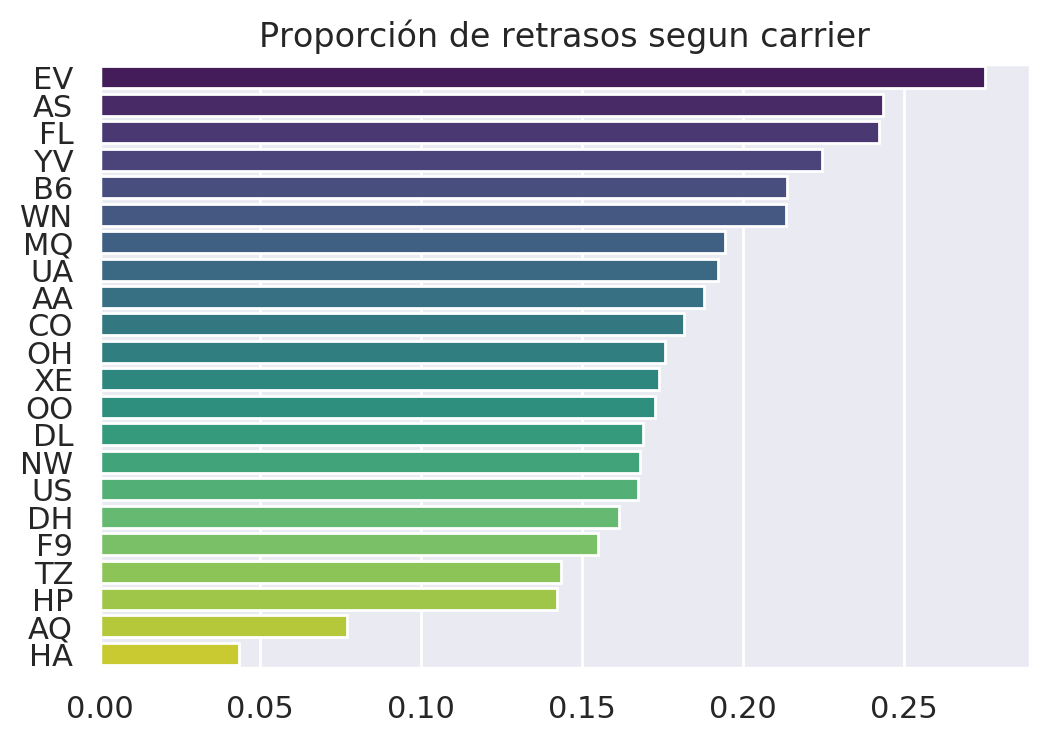

In [67]:
sns.set(rc={"figure.dpi": 200, 'savefig.dpi': 200})

ax = sns.barplot(
    x="dep_delayed_int", 
    y="UniqueCarrier", 
    data=df, 
    estimator=np.mean, 
    ci=None,
    order=carriers_ordered,
    palette=sns.color_palette("viridis", 22))



ax.set(title='Proporción de retrasos segun carrier', xlabel='', ylabel='')
